# TC1002S Herramientas computacionales: el arte de la analítica


This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Fernando Gabriel Gutierrez Madrigal

- ID: A01424790

- My carreer: Robotica y Sistemas Digitales


# Importing libraries

In [164]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PART 1
# Use your assigned dataset

## A1 Load data

In [165]:

dir = "/Users/fernando/Pictures/Escul/semanaTec_1/TC1002S/NotebooksStudents/A01424790/A01424790.csv"

data = pd.read_csv(dir)

## A2 Data managment


Print the first 7 rows

In [166]:
data.head(7)

,Unnamed: 0,x1,x2
0,0,-0.385369,-0.876526
1,1,0.174726,-1.051913
2,2,1.044367,-0.397331
3,3,-0.941149,-0.363687
4,4,-1.030361,0.522805
5,5,0.881625,-0.520826
6,6,-0.741769,-0.554370


Print the first 4 last rows

In [167]:
data.tail(4)

,Unnamed: 0,x1,x2
1696,1696,1.056884,0.009163
1697,1697,-0.012365,-0.334657
1698,1698,0.047409,-0.327727
1699,1699,-1.603400,0.361431


How many rows and columns are in your data?

Use the `shape` method


In [168]:
data.shape

(1700, 3)

Print the name of all columns 

Use the `columns` method

In [169]:
data.columns

Index(['Unnamed: 0', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [170]:
data.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
dtype: object

What is the meaning of rows and columns?

In [171]:
# Your responses here

# 1) indice

# 2) datos en x1

# 3) datos en x2

#...

Print a statistical summary of your columns


data.describe()

In [172]:
# 1) What is the minumum and maximum values of each variable
#Para el indice el minimo es 0, x1 el menor es -2.186449 y x2 -1.174163; 
#los maximos son 1699 para el indice(dado que son 1700 valores en total), para x1 es
#1.226250 y para x2 0.744812

# 2) What is the mean and standar deviation of each variable
# Promedio del indice es 849.5, x1 es de -0.500855 y x2 -0.251228
# Desviacion estandar del indice es 480.892045, x1 0.871573 y x2 0.503797

# 3) What the 25%, 50% and 75% represent?
#Los cuartiles de las columnas


Rename the columns using the same name with capital letters

In [173]:
data.columns = ["Index", "X1", "X2"]

Rename the columns to their original names

In [174]:
data.columns = ["0", "x1", "x2"]

Use two different alternatives to get one of the columns

In [175]:
colAux = data.iloc[:, [1]]
colAux

,x1
0,-0.385369
1,0.174726
2,1.044367
3,-0.941149
4,-1.030361
...,...
1695,-1.998536
1696,1.056884
1697,-0.012365
1698,0.047409


In [176]:
colAux_2= data.loc[:,["x1"]]
colAux_2

,x1
0,-0.385369
1,0.174726
2,1.044367
3,-0.941149
4,-1.030361
...,...
1695,-1.998536
1696,1.056884
1697,-0.012365
1698,0.047409


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [177]:
auxdf = data.iloc[:,[1,2]]
auxdf
data_slice = auxdf[62:73]
data_slice

,x1,x2
62,0.296070,-1.003126
63,0.099948,-1.061888
64,-0.968164,-0.076271
65,0.253970,-0.951552
66,-1.013007,0.626127
67,-0.585680,-1.065290
68,-0.867387,-0.100988
69,-1.881039,-0.406395
70,-0.950687,0.055966
71,-1.296071,0.536172


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [178]:
dataSizeAux = data_slice.size
data_slice.dropna()
not_nullVals = data_slice.size
print(not_nullVals)
nullVals = dataSizeAux - data_slice.size
print(nullVals)

print("suma = "+str(not_nullVals+nullVals))


22
0
suma = 22


Discard the last column


### Questions 

Based on the previos results, provide a description of yout dataset

Your response: Los datos son confiables, dado que nuestra desviacion estandar no supera el 1, un siendo un gran set de datos con 1700 valores, ademas que el promedio esta cerca del segundo cuartil, por lo que los datos coinciden




## A3 Data visualization

Plot in the same figure the histogram of the two variables

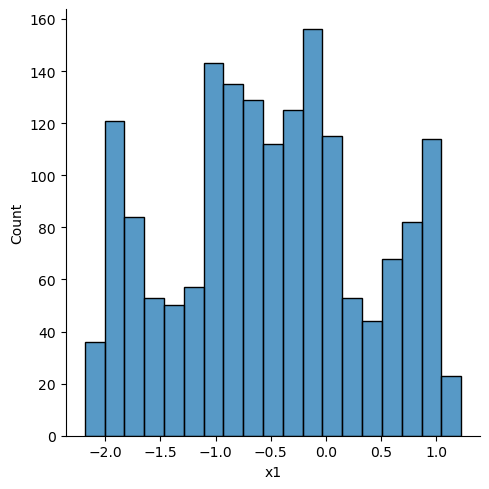

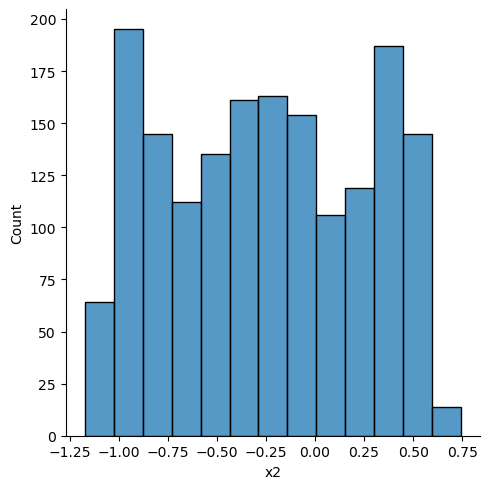

In [179]:
sns.displot(data["x1"], kde = False)
dfhist = sns.displot(data["x2"], kde = False)

plt.show()

Based on this plots, provide a description of your data:

Your response here: El segundo set tiene un menor rango que el primero; Se encuentra una similitud en la cantidad de los minimos y maximos 

Plot in the same figure the boxplot of the two variables 

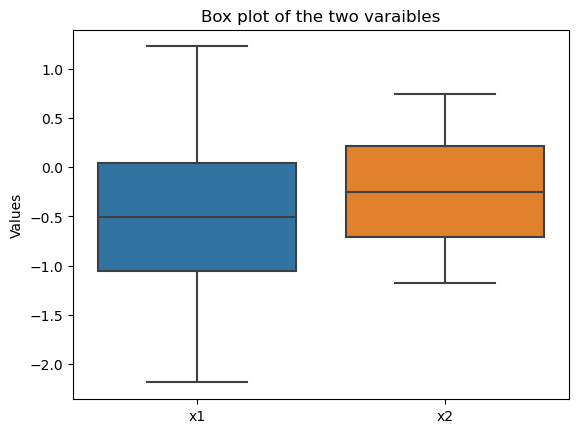

In [180]:
x = auxdf
boxp1 = sns.boxplot(data = x)
boxp1.set_title("Box plot of the two varaibles")
plt.ylabel("Values")
plt.show()

Scatter plot of the two variables

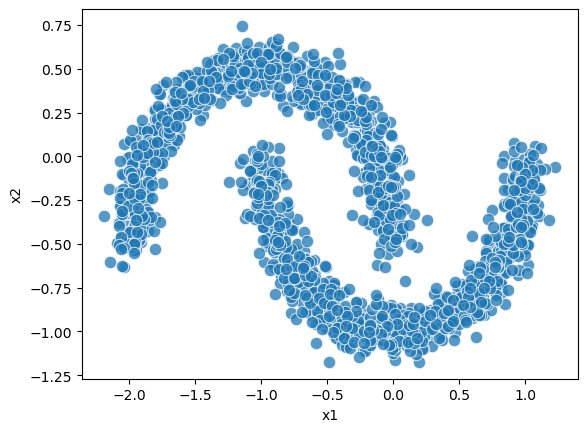

In [181]:

sns.scatterplot(data=auxdf, x="x1", y="x2", s=80, alpha=0.75)
plt.show()

### Questions 

Based on the previous plots, provide a description of yout dataset

Your response: Para este set de datos no es muy conveniente utilizar algun algoritmo para segmentar como k means, dado que no es un algoritmo tan robusto para seleccionar los datos y dado que en este se cruzan algunos no seria conveniente.s



## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [182]:
from sklearn.cluster import KMeans

K  = 2 
km = KMeans(n_clusters=K)
clusters = km.fit_predict(auxdf)

clusters

array([1, 1, 1, ..., 1, 1, 0])

Add to your dataset a column with the assigned cluster to each data point

In [183]:
auxdf['clusters'] = clusters

Print the number associated to each cluster

In [184]:
auxdf

,x1,x2,clusters
0,-0.385369,-0.876526,1
1,0.174726,-1.051913,1
2,1.044367,-0.397331,1
3,-0.941149,-0.363687,0
4,-1.030361,0.522805,0
...,...,...,...
1695,-1.998536,-0.210431,0
1696,1.056884,0.009163,1
1697,-0.012365,-0.334657,1
1698,0.047409,-0.327727,1


Print the centroids

In [185]:
centroids = km.cluster_centers_ 
centroids

array([[-1.20798477,  0.08781761],
       [ 0.18982898, -0.58238966]])

Print the intertia metric

In [186]:
km.inertia_

700.6884961146444

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

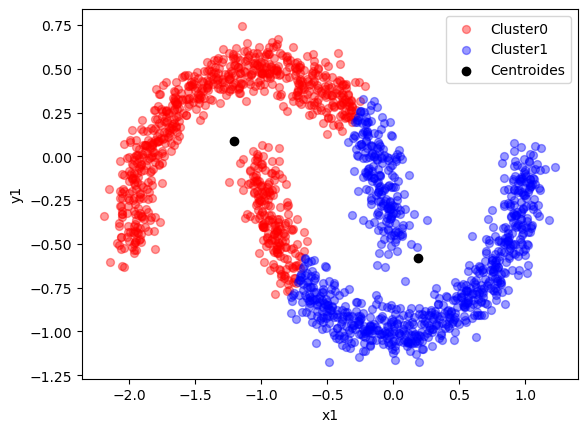

In [187]:
dfx1 = auxdf[auxdf.clusters == 0]
dfx2 = auxdf[auxdf.clusters == 1]

plt.scatter(dfx1.x1, dfx1.x2, label='Cluster0', c='r', s=32, alpha = 0.4 )
plt.scatter(dfx2.x1, dfx2.x2, label='Cluster1', c='b', s=32, alpha = 0.4 )
plt.scatter(centroids[:,0], centroids[:,1],color='black',label='Centroides')
plt.xlabel('x1')
plt.ylabel('y1')
plt.legend()
plt.show()

### Questions 

Provides a detailed description of your results

Your response: Como es posible obsevar, los datos se relacionan a la inversa y la separacion entre clusters es bastante pequena, de igual manera los centroides indican que si existe una manera de diferenciar los mismos, sin embargo el algoritmos de kmeans no es del todo fiel y util para separar estos clusters en especifico dado que si bien los centrodies estan separados y algunos datos tambien existe un cruce entre algunos lo cual no seria muy util para segmentar nuestros datos en ciertos grupos ya en una aplicacion mas real.

## A5 Elbow plot

Compute the Elbow plot

In [188]:
auxdf

,x1,x2,clusters
0,-0.385369,-0.876526,1
1,0.174726,-1.051913,1
2,1.044367,-0.397331,1
3,-0.941149,-0.363687,0
4,-1.030361,0.522805,0
...,...,...,...
1695,-1.998536,-0.210431,0
1696,1.056884,0.009163,1
1697,-0.012365,-0.334657,1
1698,0.047409,-0.327727,1


In [189]:
sse = []

kvals = range(1,10)
for k in kvals:
    km1 = KMeans(n_clusters=k, n_init="auto")
    km1.fit_predict(auxdf[["x1", "x2"]])
    sse.append(km1.inertia_)
plt.plot(kvals, sse)

TypeError: '<=' not supported between instances of 'str' and 'int'

### Questions 

What is the best number of clusters K? (argue your response)

Your response: Teoricamente mientras mas mejor sin embargo estamos hablando de dos datos, ademas que para efectos practicos 2 seria ideal ya que con esa cantidad de clusters es posible el tener una buena aproximacion sin necesidad de mas poder computacional ni tiempo. 


Does this number of clusters agree with your inital guess? (argue your response)

Your response: Si, ya que si se tiene una buena grafica con buenas aproximaciones



# PART 2
# Create a dataset and do clustering

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID (if this number is lower than 99, then multiply it by ten)
`
- 3 variables

- 4 clusters

- Standar deviation of each cluster of 1.5



In [ ]:
from sklearn.datasets import make_blobs

observations = 790
centers = 3
clusters = 4
std = 1.5

X, Y = make_blobs(n_samples = observations, n_features = clusters, centers=centers, cluster_std=std)
blobsData = pd.DataFrame(data=X)
clustersNumber = pd.DataFrame(data=Y)
blobsData["clusters"] = clustersNumber

blobsData.columns = ["x1","x2","x3","x4","clusters"]


#blobsData['clusters'] = Y
blobsData

,x1,x2,x3,x4,clusters
0,2.827178,-11.898650,6.074973,-8.768831,0
1,1.552180,-12.111330,4.452479,-9.211493,0
2,-2.184023,3.565316,-8.222140,-5.750240,1
3,1.558224,-10.226969,5.322137,-8.279736,0
4,2.779475,-9.284317,7.265766,-8.945208,0
...,...,...,...,...,...
785,-4.269792,0.359491,5.529561,5.157645,2
786,-5.804063,-0.612761,5.877568,7.665988,2
787,-2.338549,-1.369849,5.980519,3.254234,2
788,-4.842978,2.998667,6.642431,6.130727,2


2) Plot the scatter plot of your data using the real cluster labels

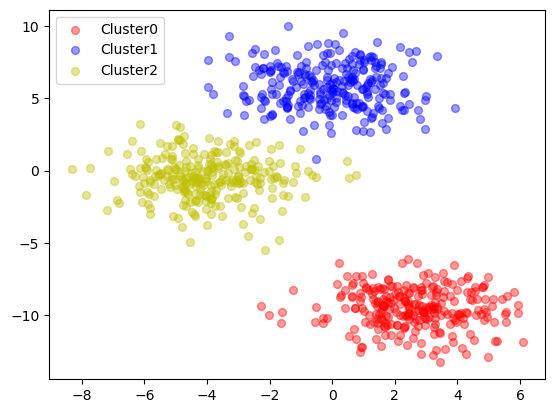

In [ ]:
import matplotlib.pyplot as plt
dfCluster0 = blobsData[blobsData.clusters == 0]
dfCluster1 = blobsData[blobsData.clusters == 1]
dfCluster2 = blobsData[blobsData.clusters == 2]
dfCluster3 = blobsData[blobsData.clusters == 3]

plt.scatter(dfCluster0.x1, dfCluster0.x2, label='Cluster0', c='r', s=32, alpha = 0.4 )
plt.scatter(dfCluster1.x1, dfCluster1.x2, label='Cluster1', c='b', s=32, alpha = 0.4 )
plt.scatter(dfCluster2.x1, dfCluster2.x2, label='Cluster2', c='y', s=32, alpha = 0.4 )
plt.legend()
plt.show()

3) Do K means clustering 

In [190]:
blobsCopy = blobsData.copy()
kmBlobs = KMeans(n_clusters=4)
yEstimated = kmBlobs.fit_predict(blobsCopy)
blobsCopy["yestimated"] = yEstimated
yEstimated


array([0, 3, 1, 0, 0, 0, 3, 2, 1, 2, 0, 1, 3, 3, 1, 1, 2, 3, 1, 2, 2, 3,
       0, 3, 1, 1, 2, 2, 0, 0, 0, 3, 0, 3, 3, 1, 1, 1, 1, 0, 2, 2, 2, 3,
       3, 0, 1, 0, 1, 2, 2, 3, 1, 0, 1, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1, 0,
       3, 0, 1, 1, 1, 0, 2, 1, 2, 0, 0, 3, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1,
       2, 1, 1, 1, 2, 3, 1, 0, 2, 2, 0, 0, 3, 2, 1, 2, 2, 2, 1, 2, 0, 1,
       1, 0, 1, 2, 3, 0, 0, 1, 2, 1, 0, 1, 2, 3, 2, 3, 3, 2, 1, 1, 3, 3,
       1, 2, 3, 3, 3, 2, 3, 2, 2, 1, 1, 0, 1, 3, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 0, 1, 1, 0, 0, 3, 2, 0, 0, 2, 0, 1, 3, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 0, 3, 0, 2, 2, 1, 0, 1, 1, 1, 2, 3, 2, 0, 2, 3, 2, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 0, 0, 0, 1, 3, 2, 1, 1, 2, 0, 2, 2, 2, 1,
       1, 3, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 3, 0, 1, 2, 0, 1, 1,
       3, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 3, 3, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 3, 3, 0, 3, 3, 0, 0, 1, 2, 2, 0, 3, 1, 1, 1, 3, 0, 1, 2, 1,
       2, 1, 3, 1, 2, 0, 3, 1, 3, 1, 2, 1, 1, 2, 1,

4) Plot the scatter plot of your data using the estimated cluster labels

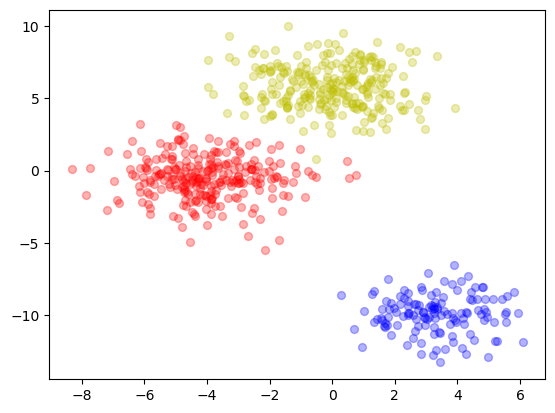

In [199]:
dfCluster0 = blobsCopy[blobsCopy.yestimated == 0]
dfCluster1 = blobsCopy[blobsCopy.yestimated == 1]
dfCluster2 = blobsCopy[blobsCopy.yestimated == 2]

plt.scatter(dfCluster0.x1, dfCluster0.x2, label='Cluster0', c='b', marker='o', s=32, alpha=0.3)
plt.scatter(dfCluster1.x1, dfCluster1.x2, label='Cluster0', c='y', marker='o', s=32, alpha=0.3)
plt.scatter(dfCluster2.x1, dfCluster2.x2, label='Cluster0', c='r', marker='o', s=32, alpha=0.3)


plt.show()


### Questions 

Provides a detailed description of your results.


Your response: Ciertamente existe una similitud y el modelo de kmeans tiene un buen comportamiento en esta situacion, ademas los resultados se cruzan muy poco, por lo que se puede hacer una buena prediccion y visualizacion con estos datos tanto reales como calculados.

# PART 3
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Considero que logre dominar en un 90 esta subcompetencia dado que fui capaz de interpretar datos tanto dimensionados como adimensionados y sin importar el numero de variables 

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Respecto a esta subcompetencia si considero que la tengo por completo dado que fui capaz de replicar un modelo algoritmo sencillo para "predecir" los valores que pertenecen a un cierto grupo